In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Bonds'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['BND', 'BNDX', 'BNDW', 'BIV']

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-26 to 2019-06-26 - 69'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 2) & (stat['21-mean'] > 0.4) & (stat['21-shrp'] > 1.2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
ITM,64,1.154535,0.427022,2.313392,0.438740
VTEB,64,1.014963,0.382761,2.216255,0.333713
HYD,64,1.159597,0.457595,2.169887,0.409066
MUB,64,0.987717,0.381796,2.150497,0.409122
CMF,64,1.024269,0.404890,2.118114,0.381602
PZA,64,1.183061,0.506748,2.005719,0.506035
TFI,64,1.042236,0.451574,1.938929,0.490727
IGIB,64,1.453410,0.786611,1.635806,0.594408
VCIT,64,1.459509,0.832827,1.552355,0.502684


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['ITM'] -1.4256439726651342 0.6 0.0877479859997807 2.3133919586649148
['ITM', 'IGIB'] -1.7657307652636252 0.10555359499628225 0.10331474889550976 1.9745991091554171
['MUB', 'IGIB'] -1.8222478629262318 -0.029448980260541546 0.10035297327188715 1.8931518559375773
['PZA', 'IGIB'] -1.8837536190141022 -0.1730351059399705 0.11004429331188784 1.8207628063860195


['PZA', 'IGIB']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['PZA', 'IGIB'], sr=0)

['PZA', 'IGIB'] -0.06299081262808268 -0.1730351059399705 0.11004429331188784 1.8207628063860195
['PZA', 'IGIB', 'ITM', 'VTEB'] -0.24968306724186734 0.4566721357657781 0.09364479699235462 2.042793106292226
['PZA', 'IGIB', 'ITM', 'HYD'] -0.25884602999927997 0.44374154407163974 0.09741242592908032 2.0312012388999294
['PZA', 'IGIB', 'ITM', 'MUB'] -0.2591408221266434 0.44344392602933363 0.09741525184402297 2.0263537559165474
['PZA', 'IGIB', 'ITM', 'TFI'] -0.2603312920995718 0.43817323758750276 0.10149547031292547 1.9734616979546207
['PZA', 'IGIB', 'ITM', 'VCIT'] -0.4041515496333617 0.2937551310536819 0.10209331931295644 1.8768180604744154
['PZA', 'IGIB', 'ITM', 'VCLT'] -0.43274974850794506 0.2384699949612088 0.12878025653084618 1.8388840044648949
['PZA', 'IGIB', 'ITM', 'LQD'] -0.43616955007969593 0.2497022212351645 0.11412822868513958 1.8352052146041062
['PZA', 'IGIB', 'VTEB', 'VCLT'] -0.4454927169846392 0.2309783691479943 0.12352891386736653 1.8145997282316542
['PZA', 'IGIB', 'VTEB', 'LQD'

['PZA', 'IGIB', 'MUB', 'LQD']

In [6]:
quote.setup_mask(['PZA', 'IGIB'])
quote.find_optimal_ratio(21, 1, .6)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'PZA': 0.41, 'IGIB': 0.19}, 0.7619, 0.234)

In [7]:
quote.setup_mask(['MUB', 'LQD'])
quote.find_optimal_ratio(21, 1, .4)

({'MUB': 0.35, 'LQD': 0.05}, 0.435, 0.137)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,1.192704,0.366512,0.328611,1.039678,1.216947,1.446045,1.977856,2.799462,0.445208
MUB,64.0,0.987717,0.381796,0.256944,0.694039,0.935146,1.283864,1.685346,2.150497,0.409122
PZA,64.0,1.183061,0.506748,0.276890,0.724951,1.131222,1.553549,2.136537,2.005719,0.506035
IGIB,64.0,1.453410,0.786611,0.296551,0.766460,1.484765,1.918528,3.412148,1.635806,0.594408
LQD,64.0,1.719987,1.120800,0.001661,0.739684,1.750669,2.445405,4.536975,1.385903,0.743382


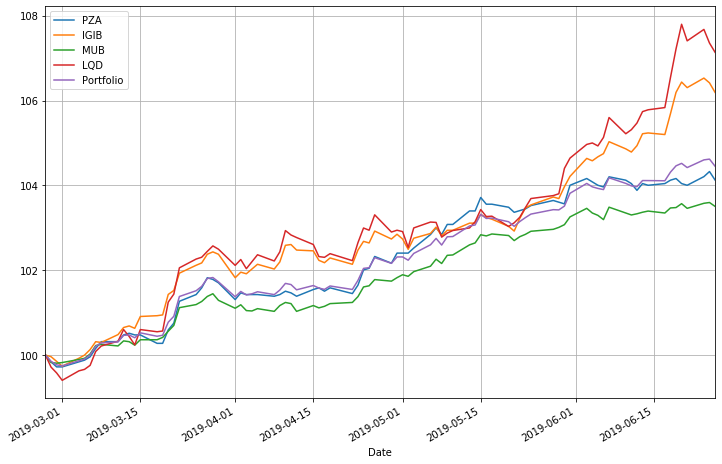

In [8]:
%pylab inline
quote.setup_mask(['PZA', 'IGIB', 'MUB', 'LQD'])
quote.graph(21, {'PZA': .41, 'IGIB': .19, 'MUB': .35, 'LQD': .05})